Bibliotecas

In [82]:
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.printing import latex

Simbolos do sympy

In [83]:
t, g, l, m, k = sp.symbols('t g l m k')

theta = sp.symbols(r'theta', cls=sp.Function)
theta = theta(t)
theta_dot = sp.diff(theta, t)
theta_ddot = sp.diff(theta_dot, t)

u = sp.symbols(r'u', cls=sp.Function)
u = u(t)
u_dot = sp.diff(u, t)
u_ddot = sp.diff(u_dot, t)

Equações da posição em 'x' e 'y' da massa

In [84]:
x = (l+u)*sp.sin(theta)
y = -(l+u)*sp.cos(theta)

Equação energia cinética

In [85]:
T1 = sp.Rational(1,2)*m*(sp.diff(x, t)**2 + sp.diff(y, t)**2)

T = T1

T

m*((-(-l - u(t))*sin(theta(t))*Derivative(theta(t), t) - cos(theta(t))*Derivative(u(t), t))**2 + ((l + u(t))*cos(theta(t))*Derivative(theta(t), t) + sin(theta(t))*Derivative(u(t), t))**2)/2

Equação energia potencial (gravitacional + elástica)

In [86]:
U1 = y*m*g
U2 = sp.Rational(1,2)*k*(u**2)

U = U1 + U2

U

g*m*(-l - u(t))*cos(theta(t)) + k*u(t)**2/2

Equação de Lagrange

In [87]:
L = T - U

L

-g*m*(-l - u(t))*cos(theta(t)) - k*u(t)**2/2 + m*((-(-l - u(t))*sin(theta(t))*Derivative(theta(t), t) - cos(theta(t))*Derivative(u(t), t))**2 + ((l + u(t))*cos(theta(t))*Derivative(theta(t), t) + sin(theta(t))*Derivative(u(t), t))**2)/2

EDO θ(t)

In [88]:
eq = sp.diff(L, theta) - sp.diff(sp.diff(L, theta_dot), t)
EDOθ = sp.simplify(eq)

EDOθ

-m*(g*l*sin(theta(t)) + g*u(t)*sin(theta(t)) + l**2*Derivative(theta(t), (t, 2)) + 2*l*u(t)*Derivative(theta(t), (t, 2)) + 2*l*Derivative(theta(t), t)*Derivative(u(t), t) + u(t)**2*Derivative(theta(t), (t, 2)) + 2*u(t)*Derivative(theta(t), t)*Derivative(u(t), t))

EDO u(t)

In [89]:
eq2 = sp.diff(L, u) - sp.diff(sp.diff(L, u_dot), t)
EDOu = sp.simplify(eq2)

EDOu

g*m*cos(theta(t)) - k*u(t) + l*m*Derivative(theta(t), t)**2 + m*u(t)*Derivative(theta(t), t)**2 - m*Derivative(u(t), (t, 2))

Solução das EDO

In [90]:
sols = sp.solve([EDOθ, EDOu], [theta_ddot, u_ddot])

sols

{Derivative(theta(t), (t, 2)): -g*sin(theta(t))/(l + u(t)) - 2*Derivative(theta(t), t)*Derivative(u(t), t)/(l + u(t)),
 Derivative(u(t), (t, 2)): g*cos(theta(t)) - k*u(t)/m + l*Derivative(theta(t), t)**2 + u(t)*Derivative(theta(t), t)**2}

Transforma as equações simbólicas em equações solucionáveis

In [91]:
dthetaddt_f = sp.lambdify((theta, theta_dot, u, u_dot, g, l, m, k), sols[theta_ddot])
duddt_f = sp.lambdify((theta, theta_dot, u, u_dot, g, l, m, k), sols[u_ddot])
dthetadt_f = sp.lambdify(theta_dot, theta_dot)
dudt_f = sp.lambdify(u_dot, u_dot)
# Ep = sp.lambdify((theta, u, g, l, m, k), U)
# Ec = sp.lambdify((theta, theta_dot, u, u_dot, m, l), T)

Função que será usada para retornar as posições e velocidades no intervalo de tempo proposto pela solução no método ODEINT

In [92]:
def dSdt(S, t, g, l, m, k):
    theta, thetad, u, ud = S
    return [dthetadt_f(thetad),
            dthetaddt_f(theta, thetad, u, ud, g, l, m, k),
            dudt_f(ud),
            duddt_f(theta, thetad, u, ud, g, l, m, k)]

Define as condições iniciais e calcula a solução das EDO's

In [93]:
tempo_simulacao = 10 # 10 s
passo = 1000 # 0.001 s
t = np.linspace(0, tempo_simulacao, passo+1)
g = 9.81
l = 1
m = 1
k = 24
deg = 30
theta0 = deg*np.pi/180
dtheta0 = 0
u0 = 0
du0 = 0

sol = odeint(dSdt, y0 =[theta0, dtheta0, u0, du0], t=t, args=(g, l, m, k))

Como a variável 'sol' é uma lista de listas onde as posições representam as soluções de cada EDO retornada em 'dSdt()', no caso as posições e velocidades de θ e u, pode-se separar cada solução em váriaveis respectivas

In [94]:
thepos = sol.T[0]
upos = sol.T[2]
thedot = sol.T[1]
udot = sol.T[3]

Com os valores de θ(t) e u(t) é possível cálcular então a posição (x,y) da massa estudada

In [95]:
def pos(t, the, u1, l):
    x1 = (l+u1)*np.sin(the)
    y1 = -(l+u1)*np.cos(the)
    return [
        x1, y1
    ]


xpos, ypos = pos(t, thepos, upos, l)


Também é possível estudar as energias cinética e potencial

In [96]:
# Pot = Ep(thepos, upos, g, l, m, k)
# Cine = Ec(thepos, thedot, upos, udot, m, l)

# Etotal = Pot + Cine

In [97]:
# plt.title('Variação das energias ao longo do tempo')
# print('Potencial:', max(Pot))
# plt.plot(t, Pot)
# plt.plot(t, Cine)
# plt.plot(t, Pot + Cine)
# plt.show()

A partir desse momento, todas as soluções foram calculadas e estão disponíveis para serem visualizadas, no caso do pêndulo estudado tem-se:

Para fins de estudo pode-se plotar a função θ(t)

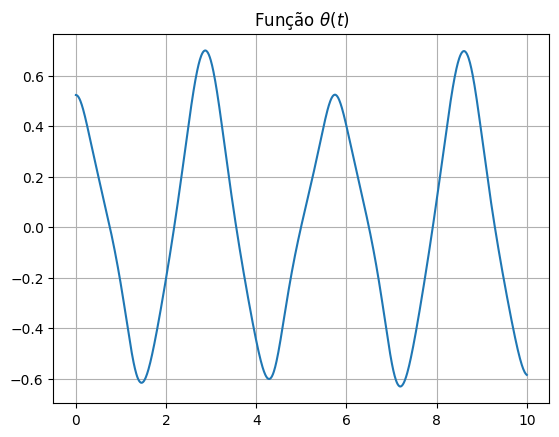

In [98]:
plt.title(f'Função ${latex(theta)}$')
plt.plot(t, thepos)
plt.grid()
plt.show()

Para fins de estudo pode-se plotar a função dθ(t)/dt

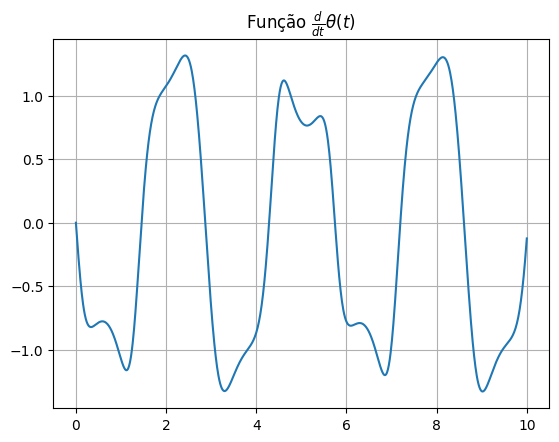

In [99]:
plt.title(f'Função ${latex(theta_dot)}$')
plt.plot(t, thedot)
plt.grid()
plt.show()

Para fins de estudo pode-se plotar a função u(t)

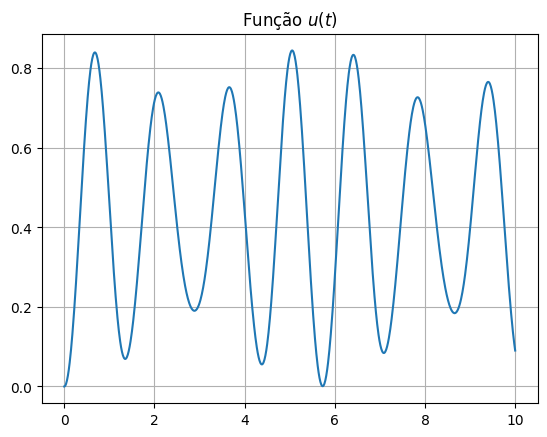

In [100]:
plt.title(f'Função ${latex(u)}$')
plt.plot(t, upos)
plt.grid()
plt.show()

Para fins de estudo pode-se plotar a função du(t)/dt

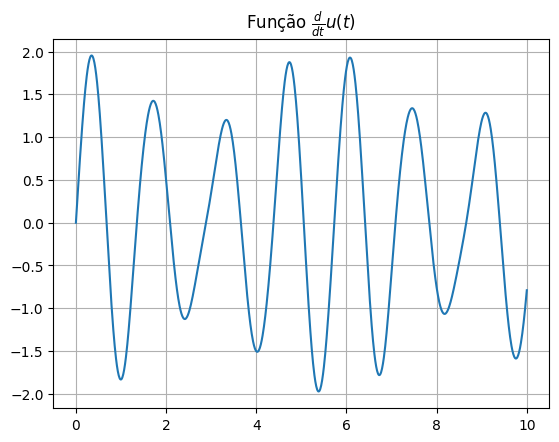

In [101]:
plt.title(f'Função ${latex(u_dot)}$')
plt.plot(t, udot)
plt.grid()
plt.show()

Pode-se plotar também as posições x(t) e y(t)

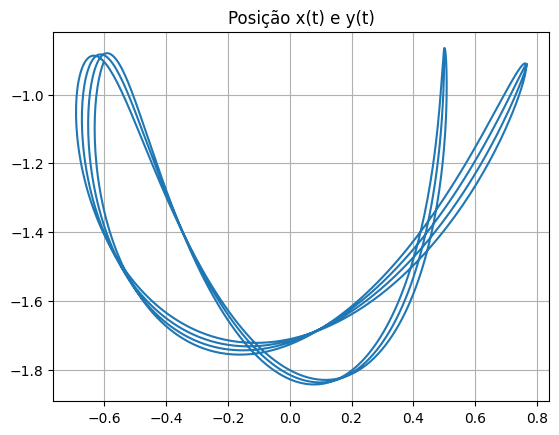

In [102]:
plt.title(f'Posição x(t) e y(t)')
plt.plot(xpos, ypos)
plt.grid()
plt.show()

Pode-se plotar a fase θ(t) e dθ(t)/dt

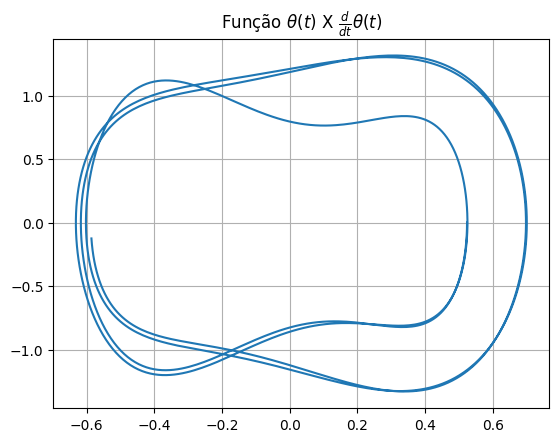

In [103]:
plt.title(f'Função ${latex(theta)}$ X ${latex(theta_dot)}$')
plt.plot(thepos, thedot)
plt.grid()
plt.show()

Pode-se plotar a fase u(t) e du(t)/dt

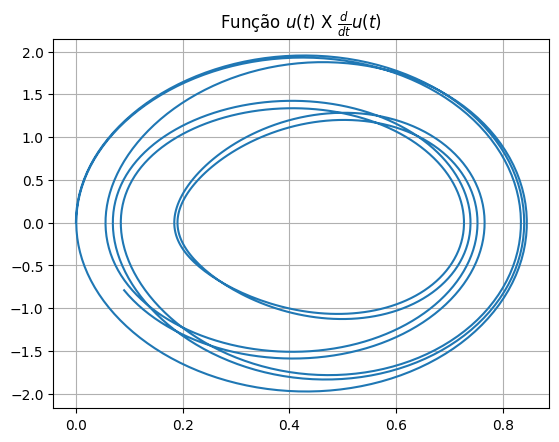

In [104]:
plt.title(f'Função ${latex(u)}$ X ${latex(u_dot)}$')
plt.plot(upos, udot)
plt.grid()
plt.show()

Pode-se ainda plotar a fase θ(t) e u(t)

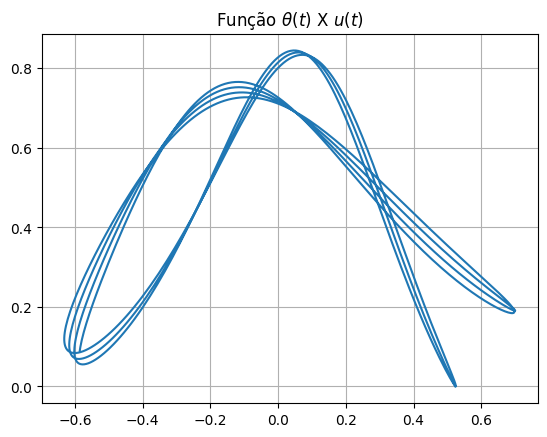

In [105]:
plt.title(f'Função ${latex(theta)}$ X ${latex(u)}$')
plt.plot(thepos, upos)
plt.grid()
plt.show()

Para fins didáticos é possível animar o pêndulo estudado

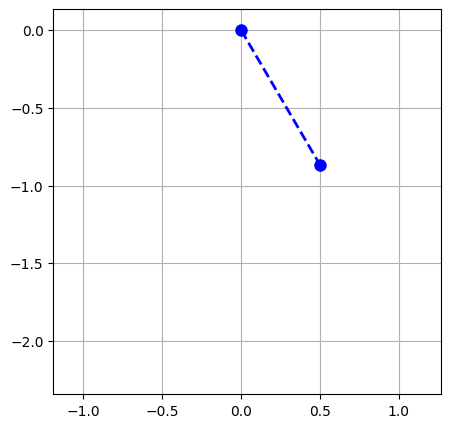

In [106]:
def animate(i):
    ln.set_data([0, xpos[i]], [0, ypos[i]])
    cur.set_data(xpos[:i+1], ypos[:i+1])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim((min(xpos)-0.5), (max(xpos)+0.5))
ax.set_ylim((min(ypos)-0.5), (max(ypos)+1))
ax.grid()
ln, = ax.plot([], [], 'bo--', lw=2, markersize=8)
cur, = ax.plot(xpos[0], ypos[0], 'black', lw=1)

ani = animation.FuncAnimation(fig, animate, frames=passo, interval=10)
ani.save('elastico.gif', writer='pillow', fps=25)